In [30]:
import utils.parser as parser

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Look at Participant/Sample Metadata

In [31]:
sample_df = pd.read_csv("hmp2_metadata_2018-08-20.csv")

/tmp/ipykernel_37150/3070548636.py:1: DtypeWarning: Columns (12,13,14,40,46,55,65,66,67,68,177,294,298,299,300,301,304,305,306,307,308,309,310,318,320,328,330,346,348,350,352,354,359,361,363,366,373,377,381,383,418,419,432,433,434,435,436,438,439,440,441,442,444,445,446,447,448,450,451,452,453,454) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv("hmp2_metadata_2018-08-20.csv")


In [36]:
from bs4 import BeautifulSoup
import os
soup = BeautifulSoup(open("products_MGX_2017-08-12.html"), 'html.parser')
a_results = soup.find_all("a")

download_links = []
download_paths = []
directory_path = "/orcd/data/braakman/001/data/assemblies/hmp2"

for element in a_results:
    download_link = element.get('href')
    if "contigs" in download_link:
        name = os.path.basename(download_link)
        file_path = os.path.join(directory_path, name)
        download_links.append(download_link)
        download_paths.append(file_path)

In [37]:
assembly_df = sample_df.query("data_type == 'metagenomics'").\
              assign(AssemblyName = sample_df["External ID"] + "_contigs.fna.gz")

assembly_df = assembly_df[assembly_df["AssemblyName"].isin([os.path.basename(path) for path in download_paths])]
assembly_df[["Participant ID", "External ID", "diagnosis"]]

,Participant ID,External ID,diagnosis
1077,C3001,CSM5MCXD,CD
1078,C3001,CSM5MCYS,CD
1079,C3001,CSM67U9J,CD
1080,C3001,CSM67UA2,CD
1081,C3001,CSM67UGC,CD
...,...,...,...
2701,P6038,PSMA26A1,UC
2702,P6038,PSMA26A3,UC
2703,P6038,PSMB4MC1,UC
2704,P6038,PSMB4MC3,UC


In [38]:
assembly_df.drop_duplicates("Participant ID")[["Participant ID", "Age at diagnosis", "sex", "site_name", "diagnosis", "Antibiotics", "Chemotherapy"]]

,Participant ID,Age at diagnosis,sex,site_name,diagnosis,Antibiotics,Chemotherapy
1077,C3001,28.0,Female,Cedars-Sinai,CD,No,No
1091,C3002,47.0,Female,Cedars-Sinai,CD,No,Yes
1102,C3003,29.0,Female,Cedars-Sinai,UC,No,No
1114,C3004,33.0,Female,Cedars-Sinai,UC,No,No
1137,C3005,58.0,Female,Cedars-Sinai,UC,No,No
...,...,...,...,...,...,...,...
2654,P6028,9.0,Male,MGH Pediatrics,CD,Yes,No
2664,P6033,15.0,Male,MGH Pediatrics,CD,No,No
2675,P6035,16.0,Male,MGH Pediatrics,UC,No,No
2686,P6037,15.0,Male,MGH Pediatrics,CD,No,No


<Axes: xlabel='diagnosis', ylabel='count'>

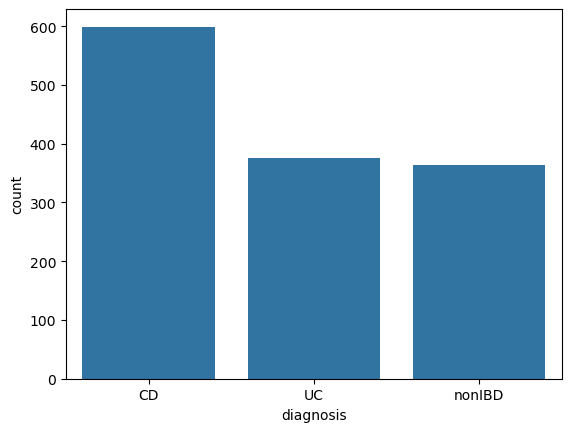

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(assembly_df[["Participant ID", "External ID", "diagnosis"]], 
            x = "diagnosis")


In [42]:
import utils.parser as parser

for line in parser.parse_contigs("/home/robcli/braakman/001/data/assemblies/hmp2/CSM5MCWG_contigs.fna.gz"):
    print(line)
    sys.exit()

ATTTTTTTGTTGCCGCGAACGAAGAGCTCAACGGCAAGCTCCTCTTCCAGCTGCTGAATGCGGGTCGTGATATTGGACTGTGCGCGGCCCAGCCGTTTTGCTGCCTGGGTGACGCTCTGCGTTTCTGCCACCTGAATGAAGATCTCGAGTGTGCTGTGGTTCATATTTTTCTTCTCAATACGATAATAATGTTGATCTTACCATCTTTAAAGGAGATGGTAAGCCTCCGGCATCGTTAATGCATGAGGAAACCATGAGCAACCCGCTGCTTTCGCTTCTTGATATTGATTATCCCCTGATTCAGGCCCCGATGGCGGGCGTCTCCACCCCCGCGCTGGCTGCCGCGGTAAGTAATGCCGGTGCGCTGGGCTCGCTGGGGCTGGGCGCTTCAACCGTTGCCCAGGCGGAAGCGATGATAGTCGCCACCCGCCAGCTGACGGACCGTCCGTTCAATGTCAATCTGTTCTGCCATGCGCCGCCCCGGCGCGACGCCCGGCGGGAAGCCGACTGGGCAACAACATTACGTCCCCATTTTGCCCGCTATGGCAGTACGCCACCGGATTCGTTAAGCGAGATCTACCAGACATTTATCGGTCATGCGCCGATGCTGGAGCTGCTTCTCGACCTGTCGCCGGCGGTGGTGAGCTTTCATTTTGGTCTTCCTGAAGGTGAGACGATCCAGCGTCTGCGGCGGCAGGGGATCGTTACCCTGGCGACAGCGACTTCGCTGCAGGAGGCGCTGCTGATTGAACAGCAGGGGATCGACGTGGTGGTCGCTCAGGGCTATGAGGCGGGCGGGCACCGGGGGATCTTTGCTCCGCAGGCGCCTGACGCGCAGCTGAGCACCTTCACCCTGGTGCAACTTCTGCGGCGTCGACTAACCATCCCGGTGGTGGCCGCCGGGGGCATCATGGACGGAGCGGGGATCGCCAGCGTGATGCAGTTGGGGGCGCAGGGCGTACAGCTCGGTACGGCGTTTTTACTGTGTCCGGAATCGGCC

NameError: name 'sys' is not defined